In [1]:
import sys
import os
from glob import glob

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("ECCOv4-py")
import ecco_v4_py as ecco
from ecco_download import *

In [7]:
dirGrid = "C:/Users/aline/OTP/ECCO4_Release3/nctiles_grid/modified/"
ds = xr.open_dataset(dirGrid + '/GRID.0002.nc', chunks={})

print(ds['XC'].values)

print("XC Coordinate:", ds.coords['XC'][0])

[[-37.5 -36.5 -35.5 ...  49.5  50.5  51.5]
 [-37.5 -36.5 -35.5 ...  49.5  50.5  51.5]
 [-37.5 -36.5 -35.5 ...  49.5  50.5  51.5]
 ...
 [-37.5 -36.5 -35.5 ...  49.5  50.5  51.5]
 [-37.5 -36.5 -35.5 ...  49.5  50.5  51.5]
 [-37.5 -36.5 -35.5 ...  49.5  50.5  51.5]]
XC Coordinate: <xarray.DataArray 'XC' (i3: 90)>
dask.array<getitem, shape=(90,), dtype=float64, chunksize=(90,), chunktype=numpy.ndarray>
Coordinates:
    i2       float64 1.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    XC       (i3) float64 dask.array<chunksize=(90,), meta=np.ndarray>
    YC       (i3) float64 dask.array<chunksize=(90,), meta=np.ndarray>
Attributes:
    long_name:  longitude
    units:      degrees_east


In [59]:
dirGrid = "C:/Users/aline/OTP/ECCO4_Release3/nctiles_grid/"
dirList = [dirGrid + file for file in os.listdir(dirGrid) if file.endswith('.nc')]

modified_nc_files_path = os.path.join(dirGrid, 'modified_4')
if not os.path.exists(modified_nc_files_path):
    os.makedirs(modified_nc_files_path)

for file in dirList:
    ds = xr.open_dataset(file, chunks={})
    
    filename = os.path.basename(file)
    
    ds['XC'] = ds['XC'].astype('float32')
    ds['YC'] = ds['YC'].astype('float32')
    
    # Now, assign these as coordinates. This step actually creates new coordinates based on these arrays
    #ds = ds.set_coords(['XC', 'YC'])
    ds.to_netcdf(os.path.join(modified_nc_files_path, filename))
    print(ds.coords)

Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0


In [63]:
import xarray as xr

dirGrid = "C:/Users/aline/OTP/ECCO4_Release3/nctiles_grid/"
dirList = [dirGrid + file for file in os.listdir(dirGrid) if file.endswith('.nc')]
datasets = []

for fp in dirList:
    ds = xr.open_dataset(fp, chunks={})  # Using chunks for lazy loading
    ds = ds.set_coords(['XC', 'YC'])  # Set 'XC' and 'YC' as coordinates
    datasets.append(ds)

aligned_datasets = xr.align(*datasets, join='outer', copy=False)
concat_dim = xr.DataArray(range(len(aligned_datasets)), dims="dataset_index")
combined_ds = xr.concat(aligned_datasets, dim=concat_dim)
combined_ds

<xarray.Dataset>
Dimensions:        (i1: 50, i2: 90, i3: 90, dataset_index: 13)
Coordinates:
  * i1             (i1) float64 1.0 2.0 3.0 4.0 5.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2             (i2) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3             (i3) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
    XC             (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC             (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
  * dataset_index  (dataset_index) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/18)
    hFacC          (dataset_index, i1, i2, i3) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    hFacW          (dataset_index, i1, i2, i3) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    hFacS          (dataset_index, i1, i2, i3) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    XG             (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG             (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    RAC            (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    ...             ...
    AngleCS        (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    AngleSN        (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    RC             (dataset_index, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    RF             (dataset_index, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    DRC            (dataset_index, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    DRF            (dataset_index, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
Attributes: (12/29)
    description:    C-grid parameters (see MITgcm documentation for details)....
    A:              :Format      = native grid (nctiles w. 13 tiles)
    B:              :source      = ECCO consortium (http://ecco-group.org/)
    C:              :institution = JPL/UT/MIT/AER
    D:              :history     = files revision history :
    E:                                 04/20/2017: fill in geometry info for ...
    ...             ...
    W:                              Geoscientific Model Development, 8, 3071-...
    date:           21-Apr-2017
    Conventions:    CF-1.6
    _FillValue:     nan
    missing_value:  nan
    program:        file created using gcmfaces_IO/write2nctiles.m \n

In [64]:
combined_ds['XC']

<xarray.DataArray 'XC' (dataset_index: 13, i2: 90, i3: 90)>
dask.array<concatenate, shape=(13, 90, 90), dtype=float64, chunksize=(1, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i2             (i2) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3             (i3) float64 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
    XC             (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC             (dataset_index, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
  * dataset_index  (dataset_index) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  longitude
    units:      degrees_east

In [62]:
modified_dirList = [modified_nc_files_path + '/' + file for file in os.listdir(modified_nc_files_path) if file.endswith('.nc')]
for file_path in modified_dirList[:1]:  # Add your file paths here
    print(file_path)
    ds = xr.open_dataset(file_path)

ds = xr.open_dataset(modified_dirList[1])
print()

C:/Users/aline/OTP/ECCO4_Release3/nctiles_grid/modified_4/GRID.0001.nc


<xarray.Dataset>
Dimensions:  (i1: 50, i2: 90, i3: 90)
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
Data variables: (12/20)
    hFacC    (i1, i2, i3) float64 ...
    hFacW    (i1, i2, i3) float64 ...
    hFacS    (i1, i2, i3) float64 ...
    XC       (i2, i3) float32 ...
    YC       (i2, i3) float32 ...
    XG       (i2, i3) float64 ...
    ...       ...
    AngleCS  (i2, i3) float64 ...
    AngleSN  (i2, i3) float64 ...
    RC       (i1) float64 ...
    RF       (i1) float64 ...
    DRC      (i1) float64 ...
    DRF      (i1) float64 ...
Attributes: (12/29)
    description:    C-grid parameters (see MITgcm documentation for details)....
    A:              :Format      = native grid (nctiles w. 13 tiles)
    B:              :source      = ECCO consortium (http://ecco-group.org/)
    C:              :institution = JPL/UT/MIT/AER
    D:              :history     = files revision history :
    E:                                 04/20/2017: fill in geometry info for ...
    ...             ...
    W:                              Geoscientific Model Development, 8, 3071-...
    date:           21-Apr-2017
    Conventions:    CF-1.6
    _FillValue:     nan
    missing_value:  nan
    program:        file created using gcmfaces_IO/write2nctiles.m \n

In [56]:
def grid_load(dirGrid, fileFormat="nctiles", omitNativeGrid=False):

    if omitNativeGrid:
        print("Native grid loading is omitted.")
        return None

    # Construct file path pattern based on fileFormat
    if fileFormat == "nctiles":
        ecco_file_pattern = os.path.join(dirGrid, "*.nc")
        #ecco_file_pattern = os.path.join(dirGrid, "Grid.0010.nc")
    else:
        print("Unsupported file format:", fileFormat)
        return None

    # TO CHECK -- 'nested' instead of 'by_coords', with conflicting values (solved with 'override')
    #xds = xr.open_mfdataset(ecco_file_pattern, concat_dim='XC', combine='nested')
    xds = xr.open_mfdataset(ecco_file_pattern, parallel = True, data_vars = 'minimal', coords = 'minimal', compat = 'override')
    return xds

dirGrid = "C:/Users/aline/OTP/ECCO4_Release3/nctiles_grid/"
mygrid = grid_load(modified_nc_files_path)

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [52]:
mygrid

<xarray.Dataset>
Dimensions:  (i1: 50, i2: 90, i3: 90, extra: 13)
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    XC       (extra, i2, i3) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC       (extra, i2, i3) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
Dimensions without coordinates: extra
Data variables: (12/18)
    hFacC    (extra, i1, i2, i3) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    hFacW    (extra, i1, i2, i3) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    hFacS    (extra, i1, i2, i3) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    XG       (extra, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG       (extra, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    RAC      (extra, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    ...       ...
    AngleCS  (extra, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    AngleSN  (extra, i2, i3) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    RC       (extra, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    RF       (extra, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    DRC      (extra, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    DRF      (extra, i1) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
Attributes: (12/29)
    description:    C-grid parameters (see MITgcm documentation for details)....
    A:              :Format      = native grid (nctiles w. 13 tiles)
    B:              :source      = ECCO consortium (http://ecco-group.org/)
    C:              :institution = JPL/UT/MIT/AER
    D:              :history     = files revision history :
    E:                                 04/20/2017: fill in geometry info for ...
    ...             ...
    W:                              Geoscientific Model Development, 8, 3071-...
    date:           21-Apr-2017
    Conventions:    CF-1.6
    _FillValue:     nan
    missing_value:  nan
    program:        file created using gcmfaces_IO/write2nctiles.m \n

In [76]:
LatA = mygrid['YC'][4]

print(f"Latitude range: {LatA.min().values if hasattr(LatA.min(), 'values') else LatA.min()} to {LatA.max().values if hasattr(LatA.max(), 'values') else LatA.max()}")

LatA

Latitude range: -56.73891067504883 to 9.48239803314209


<xarray.DataArray 'YC' (i2: 90, i3: 90)>
dask.array<getitem, shape=(90, 90), dtype=float32, chunksize=(90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
    XC       (i2, i3) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    YC       (i2, i3) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
Attributes:
    long_name:  latitude
    units:      degrees_north

In [68]:
nc_files = [os.path.join(dirGrid, file) for file in os.listdir(dirGrid) if file.endswith('.nc')]
datasets = [xr.open_dataset(file_path) for file_path in nc_files]
combined = xr.concat(datasets, dim='chunk')

In [109]:
import xgcm

AssertionError: 

In [78]:
LatA = combined_ds["YC"][0]

# If LatA is a NumPy array or an xarray DataArray, you can check its min and max
if hasattr(LatA, 'min') and hasattr(LatA, 'max'):
    print(f"Latitude range: {LatA.min().values if hasattr(LatA.min(), 'values') else LatA.min()} to {LatA.max().values if hasattr(LatA.max(), 'values') else LatA.max()}")
    
lat1 = -70
lat2 = -50

# Find indices within latitude bounds
[Ind1, Ind2] = np.where((LatA >= lat1) & (LatA <= lat2))
print(Ind1)
print(Ind2)

Size1 = np.max(Ind1) - np.min(Ind1) + 1
Size2 = np.max(Ind2) - np.min(Ind2) + 1
SizeMin, SizeMax = np.min([Size1, Size2]), np.max([Size1, Size2])
print(SizeMin, SizeMax)

Latitude range: -89.87305450439453 to -57.27140808105469
[60 60 60 ... 89 89 89]
[ 0  1  2 ... 87 88 89]
30 90


In [79]:
if SizeMin == 90:
    VarNew = np.nan * np.zeros(
            (SizeMax, SizeMin * 4)
        )  # Assuming SizeMin==90 implies longitude dimension
else:
    VarNew = np.nan * np.zeros(
            (SizeMin, SizeMax * 4)
        )  # Assuming SizeMax==90 implies longitude dimension

_, Ncols = VarNew.shape
LonNew, LatNew = np.copy(VarNew), np.copy(VarNew)

In [108]:
nfaces = [0, 1, 2,3, 4]
Var = combined_ds.Depth

col1, col2 = 0, Ncols // 4

for n in nfaces:
    print(n, 'processing')
    LonA = mygrid["XC"][n]
    LatA = mygrid["YC"][n]
    VarFace = Var[n]

    # Find indices again, adjusting bounds slightly
    [Ind1, Ind2] = np.where((LatA >= lat1) & (LatA <= lat2))
    print(Ind1)
    print(Ind2)
    
    # Find indices again, adjusting bounds slightly
    LonA = LonA[np.min(Ind1):np.max(Ind1) + 1, np.min(Ind2):np.max(Ind2) + 1]
    LatA = LatA[np.min(Ind1):np.max(Ind1) + 1, np.min(Ind2):np.max(Ind2) + 1]
    VarFace = VarFace[np.min(Ind1):np.max(Ind1) + 1, np.min(Ind2):np.max(Ind2) + 1]
    
    print(LonA.shape)

    if len(Ind1) == 90:
        LonA, LatA, VarFace = LonA.T, LatA.T, VarFace.T

    if LonA[0, 0] > LonA[0, 1]:
        VarFace = np.fliplr(VarFace)
        LonA = np.fliplr(LonA)
        LatA = np.fliplr(LatA)

    a, _ = LatA.shape
    if a > 1 and LatA[0, 0] > LatA[1, 0]:
        VarFace = np.flipud(VarFace)
        LonA = np.flipud(LonA)
        LatA = np.flipud(LatA)
    
    
    print(col1)
    print(col2)

    '''
    VarNew[:, col1:col2] = VarFace
    LonNew[:, col1:col2] = LonA
    LatNew[:, col1:col2] = LatA
    '''
    
    print(VarNew.shape)

    col1 = col2
    col2 = col1 + Ncols // 4

0 processing
[60 60 60 ... 89 89 89]
[ 0  1  2 ... 87 88 89]
(30, 90)
0
90
(30, 360)
1 processing
[ 0  0  0 ... 11 11 11]
[ 0  1  2 ... 87 88 89]
(12, 90)
90
180
(30, 360)
2 processing
[]
[]


ValueError: zero-size array to reduction operation minimum which has no identity

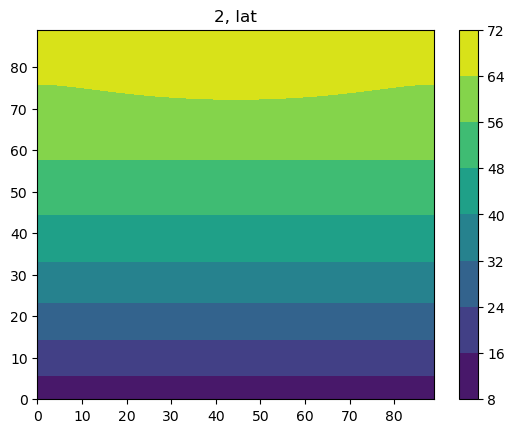

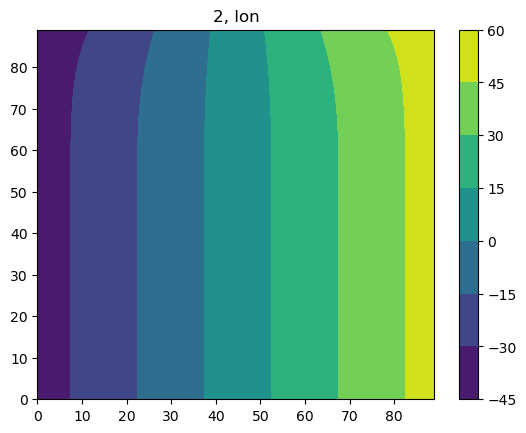

In [84]:
n = 2  # Example index, adjust as per your loop or data structure

# Plotting LatA
plt.figure()
plt.contourf(LatA)  # Assuming LatA is a 2D DataArray or NumPy array
plt.title(f'{n}, lat')
plt.colorbar()
plt.show()

# Plotting LonA
plt.figure()
plt.contourf(LonA)  # Assuming LonA is a 2D DataArray or NumPy array
plt.title(f'{n}, lon')
plt.colorbar()
plt.show()


In [47]:
def LLC2ZonalStrip_V3(mygrid, Var, lat1, lat2):

    nfaces = [1, 2, 4, 5]

    LatA = mygrid["YC"]

    # If LatA is a NumPy array or an xarray DataArray, you can check its min and max
    if hasattr(LatA, 'min') and hasattr(LatA, 'max'):
        print(
            f"Latitude range: {LatA.min().values if hasattr(LatA.min(), 'values') else LatA.min()} to {LatA.max().values if hasattr(LatA.max(), 'values') else LatA.max()}")

    # Find indices within latitude bounds
    Indices = np.where((LatA >= lat1) & (LatA <= lat2))
    print(Indices)
    Ind1 = Indices[0]
    Ind2 = Indices[1]

    Size1 = np.max(Ind1) - np.min(Ind1) + 1
    Size2 = np.max(Ind2) - np.min(Ind2) + 1
    SizeMin, SizeMax = np.min([Size1, Size2]), np.max([Size1, Size2])

    if SizeMin == 90:
        VarNew = np.nan * np.zeros(
            (SizeMax, SizeMin * 4)
        )  # Assuming SizeMin==90 implies longitude dimension
    else:
        VarNew = np.nan * np.zeros(
            (SizeMin, SizeMax * 4)
        )  # Assuming SizeMax==90 implies longitude dimension

    _, Ncols = VarNew.shape
    LonNew, LatNew = np.copy(VarNew), np.copy(VarNew)

    col1, col2 = 0, Ncols // 4

    # Adjust based on actual data structure
    for n in nfaces:
        LonA = mygrid["XC"][n]
        LatA = mygrid["YC"][n]
        VarFace = Var[n]

        # Find indices again, adjusting bounds slightly
        Indices = np.where((LatA >= lat1) & (LatA <= lat2))
        Ind1 = Indices[0]
        Ind2 = Indices[1]
        print(Ind1)
        print(Ind2)
        Ind1 = np.arange(np.min(Ind1), np.max(Ind1) + 1)
        Ind2 = np.arange(np.min(Ind2), np.max(Ind2) + 1)

        LonA = LonA[np.ix_(Ind1, Ind2)]
        LatA = LatA[np.ix_(Ind1, Ind2)]
        VarFace = VarFace[np.ix_(Ind1, Ind2)]

        if len(Ind1) == 90:
            LonA, LatA, VarFace = LonA.T, LatA.T, VarFace.T

        if LonA[0, 0] > LonA[0, 1]:
            VarFace = np.fliplr(VarFace)
            LonA = np.fliplr(LonA)
            LatA = np.fliplr(LatA)

        a, _ = LatA.shape
        if a > 1 and LatA[0, 0] > LatA[1, 0]:
            VarFace = np.flipud(VarFace)
            LonA = np.flipud(LonA)
            LatA = np.flipud(LatA)

        VarNew[:, col1:col2] = VarFace
        LonNew[:, col1:col2] = LonA
        LatNew[:, col1:col2] = LatA

        col1 = col2
        col2 = col1 + Ncols // 4

    # Sort by longitude to move the 180-degree line
    IndSort = np.argsort(LonNew[0, :])
    LonNew, LatNew, VarNew = LonNew[:, IndSort], LatNew[:, IndSort], VarNew[:, IndSort]
    return LonNew, LatNew, VarNew

<xarray.DataArray 'YC' (i1: 50, i2: 90, i3: 90)>
dask.array<broadcast_to, shape=(50, 90, 90), dtype=float64, chunksize=(50, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north